<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>IBM Capstone Project, June 2020</font></h1>
<h1 align=center><font size = 4>Segmenting and clustering super neighborhoods in Houston, Texas</font></h1>

### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a><br>

2. <a href="#item2">Data</a><br>
    2.1 <a href="#item2">Data sources</a><br>
    2.2 <a href="#item2">Data description</a><br>    

3. <a href="#item3">Methodology</a><br>
    3.1 <a href="#item3.1">Download and explore dataset</a><br> 
    3.2 <a href="#item3.2">Explore single neighborhood</a><br>
    3.3 <a href="#item3.3">Analyze each neighborhood</a><br>
    3.4 <a href="#item3.4">Cluster neighborhoods</a><br>
    3.5 <a href="#item3.5">Examine clusters</a><br>    

4. <a href="#item4">Results</a>
    
5. <a href="#item5">Discussions</a>   
    
6. <a href="#item6">Conclusions</a>
    
7. <a href="#item7">References</a>
    
</font>
</div>

<a id='item1'></a>

### 1. Introduction

Houston, Texas is the fourth-largest city in the United States. City of Houston has more than 2.3 million residents and covers 634 square miles. Houston's racial or ethnic profile is diverse. Comprehensive, community-based efforts is required to promote healthy living in low-income neighborhoods in Houston. Geospatial analysis of census data with machine learning methods provides decision makers access to tools necessary for resource planning. Most of the data are updated on a regular basis. Therefore, it is important to constantly update the model based on updated data as necessary.  

#### 1.1 Background

Houston is one of the youngest, fastest-growing and most diverse populations anywhere in the world. Houston is divided into 88 geoographically designated areas, referred to as super neighborhoods. Residents, civic organizations, institutions, and businesses in these super neighborhoods are encouraged to work together to identify, plan, and set priorities to address the needs and concerns of the community. The Houston metro region offers a diverse and extensive labor force of more than three million workers, larger than 35 states. Houston ranks 21st among U.S. metros for venture capital deals.

#### 1.2 Problem

Every neighborhood in a metropolis should be a neighborhood of promise, hope, and opportunity. However many of the neighborhoods lack access to quality affordable housing, grocery, schools, and parks. The goal of this project was to analyze data available in public domain to identify zones of opportunity. This in turn would help to attract both practical and innovative investment into underinvested communities while leveraging local and state resources. The super neighborhood elects a council comprised of area residents and stakeholders that serves as a forum to discuss issues and identify and implement priority projects for the area.

Import all the dependencies that we will need.

In [2]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import requests # library to handle requests
import random # library for random number generation
import json # library to handle JSON files

# library to get centroid from polygon coordinates
!pip install geojson_utils
from geojson_utils import centroid

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# import k-means from clustering stage
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import visualization packages "Matplotlib" and "Seaborn"
# %matplotlib inline" to plot in a Jupyter notebook.
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium # plotting library

print('Libraries imported')

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/2e/aa/0c/49bc837935a4294b687119db336caaec8ba5481bd664cfbbe7
Successfully built geojson-utils
Libraries imported


<a id='item2'></a>

### 2. Data

COHGIS stands for City of Houston Geographic Information System. COHGIS dataset is a common GIS dataset published by many departments/business units at the City of Houston. GIS is used by many city departments because it provides decision makers with the tools necessary to answer complex geospatial questions. It integrates spatial and tabular information in a single consistent framework and it provides insight into patterns and spatial relationships within data that might not be obvious outside of a GIS.

#### 2.1 Data sources

2010 census data were obtained, free of charge, from COHGIS GIS Open Data portal - http://cohgis.mycity.opendata.arcgis.com. Both spreadsheet and GeoJSON formats were downloaded from the COHGIS portal. 

#### 2.1 Data description

This dataset includes demographic information by super neighborhood. The boundaries of each super neighborhood rely on major physical features (bayous, freeways, etc.) to group together contiguous communities that share common physical characteristics, identity or infrastructure. The Planning and Development Department uses information from the U.S. Census Bureau along with other agencies to develop demographic data and estimates for the City as well as City Council Districts and City Super Neighborhoods. Demographic data includes, but is not limited to: population, housing, household, income and other social characteristics.  


<a id='item3'></a>

### 3. Methodology 

In the Jupyter notebook, geographical coordinates from polygons were converted into their equivalent centroid latitude and longitude values. Also, Foursquare API was used to explore super neighborhoods in Houston. The explore function was then used to get the most common venue categories in each neighborhood, and this feature was then used to group the neighborhoods into clusters. The k-means clustering algorithm was used to complete this task. Census data were also used separately to group the neighborhoods into clusters for initial analysis. Finally, the Folium library was used to visualize the neighborhoods in Houston and their emerging clusters.

<a id='item3.1'></a>

#### 3.1 Download and explore dataset

Data were visualized to find correlation between variables. Histograms were plotted to see the distribution of total population. Scatterplots (with fitted regression lines) were generated using ‘regplot’ to understand relationship between variables. Basic statistics were computed for all continuous variables.

In [14]:
# Read census spreadsheet
# https://cohgis-mycity.opendata.arcgis.com/datasets/census-2010-by-superneighborhood?geometry=-98.408%2C29.406%2C-92.423%2C30.240
df_data_0 = pd.read_csv('2010_Census_COH_DEMOGRAPHICS_MIL.csv')
df_data_0.rename(columns={'Name':'Neighborhood'},inplace=True)
df_data_0.head()

OBJECTID  SUM_POP100  SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  \
0         1        3881       2104        3881          711            3170   
1         2       13471       5120       13471        10603            2868   
2         3       16716       3664       16716         3266           13450   
3         4        2497       1133        2497          603            1894   
4         5       49277      31563       49277         7311           41966   

   SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  ...  \
0           3091          1353          1396            11  ...   
1           2798          1063          1623            21  ...   
2          13347          6092          6562            29  ...   
3           1880            15          1853             5  ...   
4          41129         34063          2291            69  ...   

   SUM_VAP_HawPac  SUM_VAP_NH_Oth  SUM_VAP_NH_2or  SUM_TotHousing  SUM_OccHU  \
0               1               7              49            2104       1978   
1               1               6              48            5120       4406   
2               1             306              88            3664       2921   
3               0               1              11            1133        940   
4              10             113             617           31563      27432   

   SUM_VacantHU  POLYID                Neighborhood     Shapearea     Shapelen  
0           126      60                 FOURTH WARD  1.296982e+07  16572.02602  
1           714      63                 SECOND WARD  8.040472e+07  43118.77002  
2           743      61                    DOWNTOWN  7.550023e+07  39256.38749  
3           193      59  CLINTON PARK TRI-COMMUNITY  7.655352e+07  59784.69773  
4          4131      21              GREATER UPTOWN  2.297921e+08  75759.39014  

[5 rows x 32 columns]

In [15]:
# Move 'Neighborhood' column position and sort
col_name="Neighborhood"
first_col = df_data_0.pop(col_name)
df_data_0.insert(0,col_name,first_col)
print(df_data_0.shape)
df_data_0.sort_values(by=['Neighborhood'],inplace=True)
df_data_0.head()

(88, 32)


Neighborhood  OBJECTID  SUM_POP100  SUM_HU100  SUM_TotPop  \
32                    ACRES HOME        33       24465       9288       24465   
87              ADDICKS PARK TEN        88        7323       4015        7323   
82  AFTON OAKS / RIVER OAKS AREA        83       14007       8069       14007   
52                         ALIEF        53      102235      35498      102235   
60                ASTRODOME AREA        61       17697      11311       17697   

    SUM_HispPop  SUM_NonHispPop  SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  \
32         4782           19683          19525           595         18783   
87         2121            5202           5018          2849          1471   
82         1352           12655          12520         11271           457   
52        47966           54269          52936          8596         25589   
60         1840           15857          15430          5327          3670   

    ...  SUM_VAP_NH_Asi  SUM_VAP_HawPac  SUM_VAP_NH_Oth  SUM_VAP_NH_2or  \
32  ...              71               2              18              96   
87  ...             511               7              15             118   
82  ...             621               4               8              80   
52  ...           14842              25             122             847   
60  ...            5670              12              41             356   

    SUM_TotHousing  SUM_OccHU  SUM_VacantHU  POLYID    Shapearea      Shapelen  
32            9288       8434           854       6  249767480.5   87815.57942  
87            4015       3523           492       9  653292432.2  145118.39650  
82            8069       7107           962      23  100667673.1   63736.49844  
52           35498      31612          3886      25  394121668.6   94862.71506  
60           11311       9715          1596      34   88595118.0   49215.22823  

[5 rows x 32 columns]

In [16]:
# Descriptive statistical analysis
df_data_0.describe()

OBJECTID     SUM_POP100     SUM_HU100     SUM_TotPop   SUM_HispPop  \
count  88.000000      88.000000     88.000000      88.000000     88.000000   
mean   44.500000   23485.784091   9971.477273   23485.784091  10312.284091   
std    25.547342   18836.827846   7982.989758   18836.827846  10766.027192   
min     1.000000    1343.000000    729.000000    1343.000000    131.000000   
25%    22.750000   11009.250000   4451.250000   11009.250000   2238.000000   
50%    44.500000   19520.500000   7836.500000   19520.500000   6976.500000   
75%    66.250000   28986.250000  14956.000000   28986.250000  15736.250000   
max    88.000000  102235.000000  35498.000000  102235.000000  48613.000000   

       SUM_NonHispPop  SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  \
count       88.000000      88.000000     88.000000     88.000000   
mean     13173.500000   12922.329545   6015.704545   5424.238636   
std      12359.164964   12095.191704   8740.416109   6462.416309   
min        318.000000     316.000000     15.000000    143.000000   
25%       3837.500000    3773.250000    612.250000    956.500000   
50%       9779.500000    9571.000000   2269.000000   2287.500000   
75%      17496.250000   17296.250000   7241.000000   7575.250000   
max      54269.000000   52936.000000  47441.000000  26146.000000   

       SUM_NH_AmInd  ...  SUM_VAP_NH_Asi  SUM_VAP_HawPac  SUM_VAP_NH_Oth  \
count     88.000000  ...       88.000000       88.000000       88.000000   
mean      39.170455  ...     1139.022727        6.272727       31.147727   
std       35.533446  ...     2165.354055        8.073979       40.989357   
min        0.000000  ...        0.000000        0.000000        0.000000   
25%       16.750000  ...       74.750000        1.000000        8.750000   
50%       30.000000  ...      414.000000        3.000000       18.000000   
75%       46.250000  ...     1024.250000        9.000000       37.250000   
max      189.000000  ...    14842.000000       41.000000      306.000000   

       SUM_VAP_NH_2or  SUM_TotHousing     SUM_OccHU  SUM_VacantHU     POLYID  \
count       88.000000       88.000000     88.000000     88.000000  88.000000   
mean       161.636364     9971.477273   8746.738636   1224.738636  44.500000   
std        183.982144     7982.989758   7082.958781   1030.913327  25.547342   
min          1.000000      729.000000    529.000000     49.000000   1.000000   
25%         48.000000     4451.250000   3759.250000    610.000000  22.750000   
50%         84.500000     7836.500000   6735.500000    918.500000  44.500000   
75%        211.000000    14956.000000  11811.250000   1587.750000  66.250000   
max        847.000000    35498.000000  31612.000000   4649.000000  88.000000   

          Shapearea       Shapelen  
count  8.800000e+01      88.000000  
mean   1.892667e+08   70755.569255  
std    1.964558e+08   54369.082710  
min    1.296982e+07   16572.026020  
25%    7.886600e+07   42027.006910  
50%    1.174943e+08   55480.689025  
75%    2.201307e+08   81108.072502  
max    9.804367e+08  429584.142100  

[8 rows x 31 columns]

In [17]:
df_data_0.columns

Index(['Neighborhood', 'OBJECTID', 'SUM_POP100', 'SUM_HU100', 'SUM_TotPop',
       'SUM_HispPop', 'SUM_NonHispPop', 'SUM_NHOneRace', 'SUM_NH_White',
       'SUM_NH_Black', 'SUM_NH_AmInd', 'SUM_NH_Asian', 'SUM_NH_HawPacI',
       'SUM_NH_Other', 'SUM_NH_2orMore', 'SUM_VAP_TotPop', 'SUM_VAP_HispPo',
       'SUM_VAP_NonHis', 'SUM_VAP_NHOneR', 'SUM_VAP_NH_Whi', 'SUM_VAP_NH_Bla',
       'SUM_VAP_NH_AmI', 'SUM_VAP_NH_Asi', 'SUM_VAP_HawPac', 'SUM_VAP_NH_Oth',
       'SUM_VAP_NH_2or', 'SUM_TotHousing', 'SUM_OccHU', 'SUM_VacantHU',
       'POLYID', 'Shapearea', 'Shapelen'],
      dtype='object')

In [18]:
df_data_0.dtypes

Neighborhood       object
OBJECTID            int64
SUM_POP100          int64
SUM_HU100           int64
SUM_TotPop          int64
SUM_HispPop         int64
SUM_NonHispPop      int64
SUM_NHOneRace       int64
SUM_NH_White        int64
SUM_NH_Black        int64
SUM_NH_AmInd        int64
SUM_NH_Asian        int64
SUM_NH_HawPacI      int64
SUM_NH_Other        int64
SUM_NH_2orMore      int64
SUM_VAP_TotPop      int64
SUM_VAP_HispPo      int64
SUM_VAP_NonHis      int64
SUM_VAP_NHOneR      int64
SUM_VAP_NH_Whi      int64
SUM_VAP_NH_Bla      int64
SUM_VAP_NH_AmI      int64
SUM_VAP_NH_Asi      int64
SUM_VAP_HawPac      int64
SUM_VAP_NH_Oth      int64
SUM_VAP_NH_2or      int64
SUM_TotHousing      int64
SUM_OccHU           int64
SUM_VacantHU        int64
POLYID              int64
Shapearea         float64
Shapelen          float64
dtype: object

In [25]:
# Read GeoJSON file from City of Houston GIS portal
# https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.geojson

# !wget --quiet https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.geojson -O ./houston_demo_data.json

In [19]:
# Read GeoJSON file downloaded from City of Houston GIS portal
# https://opendata.arcgis.com/datasets/f50cc53c15bf4fb3940ab6e8c2534f3d_2.geojson
js=json.load(open('houston_demo_data.json'))
#js

In [60]:
houston_geo = r'houston_demo_data.json' # geojson file

In [30]:
js['features'][0]['geometry']['coordinates']

[[[-95.3858120191703, 29.76157948522655],
  [-95.3857510351169, 29.759096134455724],
  [-95.38575701432947, 29.7589274318535],
  [-95.38581341906735, 29.75809220348262],
  [-95.38571553175525, 29.757628886192457],
  [-95.38567397795319, 29.753574178823797],
  [-95.38575841615513, 29.753438202654888],
  [-95.3857221276755, 29.750280400839365],
  [-95.38400247507784, 29.750315844530196],
  [-95.38376001290212, 29.750262353841276],
  [-95.38306079824628, 29.750263251865572],
  [-95.38292995838663, 29.7502629855325],
  [-95.38275658665567, 29.75026174321319],
  [-95.38236319724997, 29.75026315626],
  [-95.38215670604383, 29.750262222158124],
  [-95.3821740186079, 29.751418599411117],
  [-95.38128633181705, 29.75142144804998],
  [-95.38129232897549, 29.75205218355559],
  [-95.37865653521057, 29.75206933999501],
  [-95.37863681471819, 29.753068750080033],
  [-95.37862191853667, 29.753954452368973],
  [-95.3783049604382, 29.753956372471624],
  [-95.37802505853546, 29.753958091193354],
  [-95.

In [31]:
js['features'][0]['properties']['Name']

'FOURTH WARD'

In [38]:
def extract_values(obj, key):
    """Pull all values of specified key from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    results = extract(obj, arr, key)
    return results

In [39]:
Neighborhood = extract_values(js, 'Name')
Neighborhood

['FOURTH WARD',
 'SECOND WARD',
 'DOWNTOWN',
 'CLINTON PARK TRI-COMMUNITY',
 'GREATER UPTOWN',
 'GREATER INWOOD',
 'GREATER HOBBY AREA',
 'GOLFCREST / BELLFORT / REVEILLE',
 'ELDRIDGE / WEST OAKS',
 'WASHINGTON AVENUE COALITION / MEMORIAL PARK',
 'GREATER FIFTH WARD',
 'DENVER HARBOR / PORT HOUSTON',
 'PLEASANTVILLE AREA',
 'NORTHSHORE',
 'LAZY BROOK / TIMBERGROVE',
 'GREATER HEIGHTS',
 'KASHMERE GARDENS',
 'MINNETEX',
 'NORTHSIDE VILLAGE',
 'SPRING BRANCH EAST',
 'SPRING BRANCH NORTH',
 'EL DORADO / OATES PRAIRIE',
 'SPRING BRANCH CENTRAL',
 'HUNTERWOOD',
 'SETTEGAST',
 'LANGWOOD',
 'INDEPENDENCE HEIGHTS',
 'CENTRAL NORTHWEST',
 'TRINITY / HOUSTON GARDENS',
 'CARVERDALE',
 'EASTEX - JENSEN AREA',
 'EAST HOUSTON',
 'ACRES HOME',
 'NORTHSIDE/NORTHLINE',
 'HIDDEN VALLEY',
 'EAST LITTLE YORK / HOMESTEAD',
 'WILLOWBROOK',
 'GREATER GREENSPOINT',
 'IAH / AIRPORT AREA',
 'KINGWOOD AREA',
 'LAKE HOUSTON',
 'FAIRBANKS / NORTHWEST CROSSING',
 'WESTBRANCH',
 'SHARPSTOWN',
 'WESTWOOD',
 'FORT BEN

In [40]:
coordinates = []
polygons = []

for feature in js['features']:
    polygons.append(feature['geometry']['coordinates'])

print(len(polygons))

for polygon in polygons:
    # print(type(polygon))
    # print(len(polygon))
    string =  str(polygon)

    temp= '{"type": "Polygon","coordinates": ' + string + '}'
    temp2 = json.loads(temp)
    newCords = centroid(temp2)
    #newCords = string[2:42]
    coordinates.append(newCords)

88


In [41]:
print(type(Neighborhood))
print(type(coordinates))

<class 'list'>
<class 'list'>


In [42]:
houston_data=pd.DataFrame(list(zip(Neighborhood,coordinates)),columns=['Neighborhood','Coordinates'])
print(houston_data)

                  Neighborhood  \
0                  FOURTH WARD   
1                  SECOND WARD   
2                     DOWNTOWN   
3   CLINTON PARK TRI-COMMUNITY   
4               GREATER UPTOWN   
..                         ...   
83            BRIARFOREST AREA   
84         NEARTOWN - MONTROSE   
85                    MEMORIAL   
86          SPRING BRANCH WEST   
87            ADDICKS PARK TEN   

                                          Coordinates  
0   {'type': 'Point', 'coordinates': [-95.38076587...  
1   {'type': 'Point', 'coordinates': [-95.32793855...  
2   {'type': 'Point', 'coordinates': [-95.35909630...  
3   {'type': 'Point', 'coordinates': [-95.26271401...  
4   {'type': 'Point', 'coordinates': [-95.47561354...  
..                                                ...  
83  {'type': 'Point', 'coordinates': [-95.57439510...  
84  {'type': 'Point', 'coordinates': [-95.39721716...  
85  {'type': 'Point', 'coordinates': [-95.58442875...  
86  {'type': 'Point', 'coordina

In [43]:
houston_data.dtypes

Neighborhood    object
Coordinates     object
dtype: object

In [44]:
houston_data.head()

Neighborhood  \
0                 FOURTH WARD   
1                 SECOND WARD   
2                    DOWNTOWN   
3  CLINTON PARK TRI-COMMUNITY   
4              GREATER UPTOWN   

                                         Coordinates  
0  {'type': 'Point', 'coordinates': [-95.38076587...  
1  {'type': 'Point', 'coordinates': [-95.32793855...  
2  {'type': 'Point', 'coordinates': [-95.35909630...  
3  {'type': 'Point', 'coordinates': [-95.26271401...  
4  {'type': 'Point', 'coordinates': [-95.47561354...

In [45]:
houston_data["Coordinates"]=houston_data["Coordinates"].astype(str)
new=houston_data["Coordinates"].str.split("[",n=1,expand=True)
new.head()

0                                         1
0  {'type': 'Point', 'coordinates':   -95.38076587000045, 29.757115474321658]}
1  {'type': 'Point', 'coordinates':    -95.32793855948876, 29.75096227654116]}
2  {'type': 'Point', 'coordinates':   -95.35909630715649, 29.756688570187087]}
3  {'type': 'Point', 'coordinates':    -95.26271401787493, 29.74839696709907]}
4  {'type': 'Point', 'coordinates':   -95.47561354557659, 29.756551579866983]}

In [46]:
new1=new[1].str.split("]",n=1,expand=True)
new1.head()

0  1
0  -95.38076587000045, 29.757115474321658  }
1   -95.32793855948876, 29.75096227654116  }
2  -95.35909630715649, 29.756688570187087  }
3   -95.26271401787493, 29.74839696709907  }
4  -95.47561354557659, 29.756551579866983  }

In [47]:
new2=new1[0].str.split(",",n=1,expand=True)
new2.head()

0                    1
0  -95.38076587000045   29.757115474321658
1  -95.32793855948876    29.75096227654116
2  -95.35909630715649   29.756688570187087
3  -95.26271401787493    29.74839696709907
4  -95.47561354557659   29.756551579866983

In [48]:
houston_data["Latitude"]=new2[1]
houston_data["Longitude"]=new2[0]
houston_data.drop(columns=["Coordinates"],inplace=True)

In [49]:
houston_data.sort_values(by=['Neighborhood'],inplace=True)
houston_data

Neighborhood             Latitude           Longitude
32                        ACRES HOME   29.864097236400905  -95.43626668096061
87                  ADDICKS PARK TEN   29.813149745221093  -95.62979046456292
82      AFTON OAKS / RIVER OAKS AREA    29.74792116154408  -95.43563576038133
52                             ALIEF   29.686317005174633  -95.58639242232414
60                    ASTRODOME AREA   29.687929792715206  -95.39496596241122
..                               ...                  ...                 ...
55                          WESTBURY   29.653772427058236  -95.48230045389012
70                         WESTCHASE    29.72697925826315   -95.5666801196713
44                          WESTWOOD   29.676079721388305  -95.55007349159578
56  WILLOW MEADOWS / WILLOWBEND AREA    29.66726507791192  -95.44973079213776
36                       WILLOWBROOK    29.95391898003096  -95.54302334251815

[88 rows x 3 columns]

In [50]:
houston_data.dtypes

Neighborhood    object
Latitude        object
Longitude       object
dtype: object

In [51]:
houston_data[["Latitude","Longitude"]]=houston_data[["Latitude","Longitude"]].apply(pd.to_numeric)

In [52]:
houston_data.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [53]:
houston_data = houston_data.join(df_data_0.set_index('Neighborhood'), on='Neighborhood')
houston_data.head

<bound method NDFrame.head of                         Neighborhood   Latitude  Longitude  OBJECTID  \
32                        ACRES HOME  29.864097 -95.436267        33   
87                  ADDICKS PARK TEN  29.813150 -95.629790        88   
82      AFTON OAKS / RIVER OAKS AREA  29.747921 -95.435636        83   
52                             ALIEF  29.686317 -95.586392        53   
60                    ASTRODOME AREA  29.687930 -95.394966        61   
..                               ...        ...        ...       ...   
55                          WESTBURY  29.653772 -95.482300        56   
70                         WESTCHASE  29.726979 -95.566680        71   
44                          WESTWOOD  29.676080 -95.550073        45   
56  WILLOW MEADOWS / WILLOWBEND AREA  29.667265 -95.449731        57   
36                       WILLOWBROOK  29.953919 -95.543023        37   

    SUM_POP100  SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  \
32       24465       9288       244

In [54]:
houston_data.shape

(88, 34)

In [63]:
houston_data.columns

Index(['Neighborhood', 'Latitude', 'Longitude', 'OBJECTID', 'SUM_POP100',
       'SUM_HU100', 'SUM_TotPop', 'SUM_HispPop', 'SUM_NonHispPop',
       'SUM_NHOneRace', 'SUM_NH_White', 'SUM_NH_Black', 'SUM_NH_AmInd',
       'SUM_NH_Asian', 'SUM_NH_HawPacI', 'SUM_NH_Other', 'SUM_NH_2orMore',
       'SUM_VAP_TotPop', 'SUM_VAP_HispPo', 'SUM_VAP_NonHis', 'SUM_VAP_NHOneR',
       'SUM_VAP_NH_Whi', 'SUM_VAP_NH_Bla', 'SUM_VAP_NH_AmI', 'SUM_VAP_NH_Asi',
       'SUM_VAP_HawPac', 'SUM_VAP_NH_Oth', 'SUM_VAP_NH_2or', 'SUM_TotHousing',
       'SUM_OccHU', 'SUM_VacantHU', 'POLYID', 'Shapearea', 'Shapelen'],
      dtype='object')

In [145]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

bins = np.linspace(0, 120000, 7)
bins

array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.])

In [147]:
group_names = ['0-20,000', '20,000-40,000', '40,000-60,000','60,000-80,000','80,000-100,000','100,000-120,000']

In [163]:
houston_data['SUM_TotPop-binned'] = pd.cut(houston_data['SUM_TotPop'], bins, labels=group_names, include_lowest=True )
houston_data.sort_values(by=['SUM_TotPop-binned'],inplace=True)
houston_data[['SUM_TotPop','SUM_TotPop-binned']].head(20)

SUM_TotPop SUM_TotPop-binned
16        9527          0-20,000
67       12583          0-20,000
68        3158          0-20,000
34        4362          0-20,000
23        2526          0-20,000
38       10209          0-20,000
26       13388          0-20,000
56       12750          0-20,000
40       14529          0-20,000
25        8954          0-20,000
72       12648          0-20,000
14       11715          0-20,000
66       17323          0-20,000
81       17684          0-20,000
64        1343          0-20,000
73       19931          0-20,000
79       19700          0-20,000
17        3503          0-20,000
71        4877          0-20,000
62        9237          0-20,000

In [164]:
houston_data["SUM_TotPop-binned"].value_counts()

0-20,000           49
20,000-40,000      22
40,000-60,000      14
60,000-80,000       2
100,000-120,000     1
80,000-100,000      0
Name: SUM_TotPop-binned, dtype: int64

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

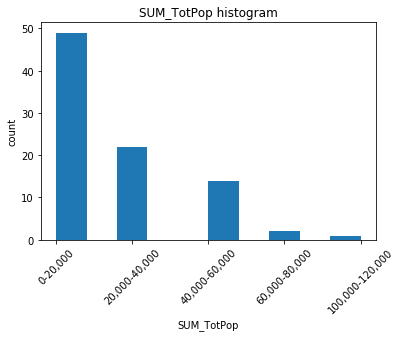

In [165]:
plt.pyplot.hist(houston_data["SUM_TotPop-binned"])

# set x/y labels and plot title
plt.pyplot.xlabel("SUM_TotPop")
plt.pyplot.ylabel("count")
plt.pyplot.title("SUM_TotPop histogram")
plt.pyplot.xticks(rotation=45)


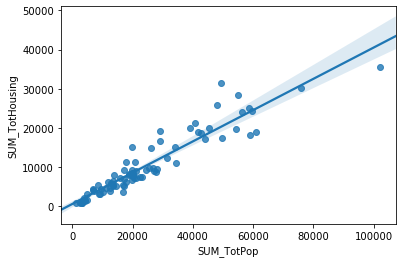

In [56]:
sns.regplot(x="SUM_TotPop", y="SUM_TotHousing", data=houston_data)

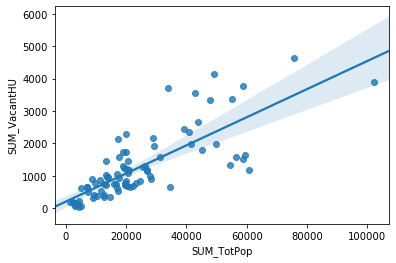

In [57]:
sns.regplot(x="SUM_TotPop", y="SUM_VacantHU", data=houston_data)

In [62]:
houston_data.describe()

Latitude  Longitude   OBJECTID     SUM_POP100     SUM_HU100  \
count  88.000000  88.000000  88.000000      88.000000     88.000000   
mean   29.756216 -95.394787  44.500000   23485.784091   9971.477273   
std     0.091272   0.115181  25.547342   18836.827846   7982.989758   
min    29.578332 -95.667038   1.000000    1343.000000    729.000000   
25%    29.691852 -95.481989  22.750000   11009.250000   4451.250000   
50%    29.747067 -95.394159  44.500000   19520.500000   7836.500000   
75%    29.814165 -95.307675  66.250000   28986.250000  14956.000000   
max    30.051070 -95.134998  88.000000  102235.000000  35498.000000   

          SUM_TotPop   SUM_HispPop  SUM_NonHispPop  SUM_NHOneRace  \
count      88.000000     88.000000       88.000000      88.000000   
mean    23485.784091  10312.284091    13173.500000   12922.329545   
std     18836.827846  10766.027192    12359.164964   12095.191704   
min      1343.000000    131.000000      318.000000     316.000000   
25%     11009.250000   2238.000000     3837.500000    3773.250000   
50%     19520.500000   6976.500000     9779.500000    9571.000000   
75%     28986.250000  15736.250000    17496.250000   17296.250000   
max    102235.000000  48613.000000    54269.000000   52936.000000   

       SUM_NH_White  ...  SUM_VAP_NH_Asi  SUM_VAP_HawPac  SUM_VAP_NH_Oth  \
count     88.000000  ...       88.000000       88.000000       88.000000   
mean    6015.704545  ...     1139.022727        6.272727       31.147727   
std     8740.416109  ...     2165.354055        8.073979       40.989357   
min       15.000000  ...        0.000000        0.000000        0.000000   
25%      612.250000  ...       74.750000        1.000000        8.750000   
50%     2269.000000  ...      414.000000        3.000000       18.000000   
75%     7241.000000  ...     1024.250000        9.000000       37.250000   
max    47441.000000  ...    14842.000000       41.000000      306.000000   

       SUM_VAP_NH_2or  SUM_TotHousing     SUM_OccHU  SUM_VacantHU     POLYID  \
count       88.000000       88.000000     88.000000     88.000000  88.000000   
mean       161.636364     9971.477273   8746.738636   1224.738636  44.500000   
std        183.982144     7982.989758   7082.958781   1030.913327  25.547342   
min          1.000000      729.000000    529.000000     49.000000   1.000000   
25%         48.000000     4451.250000   3759.250000    610.000000  22.750000   
50%         84.500000     7836.500000   6735.500000    918.500000  44.500000   
75%        211.000000    14956.000000  11811.250000   1587.750000  66.250000   
max        847.000000    35498.000000  31612.000000   4649.000000  88.000000   

          Shapearea       Shapelen  
count  8.800000e+01      88.000000  
mean   1.892667e+08   70755.569255  
std    1.964558e+08   54369.082710  
min    1.296982e+07   16572.026020  
25%    7.886600e+07   42027.006910  
50%    1.174943e+08   55480.689025  
75%    2.201307e+08   81108.072502  
max    9.804367e+08  429584.142100  

[8 rows x 33 columns]

In [64]:
houston_data.corr()

Latitude  Longitude  OBJECTID  SUM_POP100  SUM_HU100  \
Latitude        1.000000   0.006798 -0.303610   -0.115007  -0.102086   
Longitude       0.006798   1.000000 -0.165708   -0.224641  -0.310596   
OBJECTID       -0.303610  -0.165708  1.000000    0.013051   0.061648   
SUM_POP100     -0.115007  -0.224641  0.013051    1.000000   0.942421   
SUM_HU100      -0.102086  -0.310596  0.061648    0.942421   1.000000   
SUM_TotPop     -0.115007  -0.224641  0.013051    1.000000   0.942421   
SUM_HispPop    -0.097284  -0.114312 -0.075866    0.783994   0.619103   
SUM_NonHispPop -0.090541  -0.242803  0.085978    0.841184   0.897062   
SUM_NHOneRace  -0.089381  -0.240476  0.084692    0.840098   0.895137   
SUM_NH_White    0.098513  -0.115656  0.104498    0.547505   0.691242   
SUM_NH_Black   -0.202815  -0.156234 -0.036963    0.518745   0.424988   
SUM_NH_AmInd    0.002462  -0.101590  0.009389    0.861770   0.854768   
SUM_NH_Asian   -0.233764  -0.323484  0.129674    0.725412   0.731024   
SUM_NH_HawPacI  0.130643  -0.032199  0.129027    0.664275   0.687116   
SUM_NH_Other   -0.097130  -0.293937 -0.003936    0.715529   0.719503   
SUM_NH_2orMore -0.132275  -0.321664  0.133394    0.820129   0.906952   
SUM_VAP_TotPop -0.116158  -0.247723  0.025813    0.991912   0.971009   
SUM_VAP_HispPo -0.098885  -0.126809 -0.072809    0.788886   0.637269   
SUM_VAP_NonHis -0.091990  -0.256965  0.088964    0.825682   0.905873   
SUM_VAP_NHOneR -0.090833  -0.254567  0.087746    0.824878   0.904296   
SUM_VAP_NH_Whi  0.082275  -0.140811  0.100599    0.551402   0.708531   
SUM_VAP_NH_Bla -0.203419  -0.147129 -0.036896    0.495030   0.410824   
SUM_VAP_NH_AmI  0.027678  -0.112055  0.011541    0.841139   0.850275   
SUM_VAP_NH_Asi -0.232535  -0.332470  0.134037    0.718465   0.730143   
SUM_VAP_HawPac  0.073917  -0.093530  0.176257    0.714899   0.749380   
SUM_VAP_NH_Oth -0.046628  -0.215538 -0.051452    0.528759   0.551377   
SUM_VAP_NH_2or -0.144055  -0.358973  0.144428    0.795185   0.908488   
SUM_TotHousing -0.102086  -0.310596  0.061648    0.942421   1.000000   
SUM_OccHU      -0.105408  -0.294582  0.061740    0.946803   0.997765   
SUM_VacantHU   -0.066301  -0.381183  0.053184    0.792664   0.888397   
POLYID         -0.396083   0.614009  0.000317   -0.152702  -0.243708   
Shapearea       0.219237   0.114477 -0.087357    0.480713   0.429627   
Shapelen        0.326813   0.149752 -0.094675    0.361497   0.329372   

                SUM_TotPop  SUM_HispPop  SUM_NonHispPop  SUM_NHOneRace  \
Latitude         -0.115007    -0.097284       -0.090541      -0.089381   
Longitude        -0.224641    -0.114312       -0.242803      -0.240476   
OBJECTID          0.013051    -0.075866        0.085978       0.084692   
SUM_POP100        1.000000     0.783994        0.841184       0.840098   
SUM_HU100         0.942421     0.619103        0.897062       0.895137   
SUM_TotPop        1.000000     0.783994        0.841184       0.840098   
SUM_HispPop       0.783994     1.000000        0.323803       0.321951   
SUM_NonHispPop    0.841184     0.323803        1.000000       0.999958   
SUM_NHOneRace     0.840098     0.321951        0.999958       1.000000   
SUM_NH_White      0.547505     0.075244        0.768918       0.767656   
SUM_NH_Black      0.518745     0.306540        0.523603       0.527246   
SUM_NH_AmInd      0.861770     0.489219        0.887282       0.886222   
SUM_NH_Asian      0.725412     0.451443        0.712362       0.707938   
SUM_NH_HawPacI    0.664275     0.314609        0.738379       0.736879   
SUM_NH_Other      0.715529     0.425107        0.720242       0.718776   
SUM_NH_2orMore    0.820129     0.376161        0.922301       0.918721   
SUM_VAP_TotPop    0.991912     0.727903        0.877717       0.876406   
SUM_VAP_HispPo    0.788886     0.998077        0.332934       0.330848   
SUM_VAP_NonHis    0.825682     0.302894        0.994588       0.994252   
SUM_VAP_NHOneR    0.824878     0.301234        0.994808       0.994541   
SUM_VAP_NH_Wh

In [58]:
# create a plain world map
houston_map = folium.Map(location=[29.713116273827442,-95.48188497252305], zoom_start=10)

In [61]:
# generate choropleth map using the total population of each neighborhood in Houston
houston_map.choropleth(
    geo_data=houston_geo,
    data=houston_data,
    columns=['Neighborhood','SUM_TotPop'],
    key_on='feature.properties.Name',
    fill_color='YlGn',
    fill_opacity=0.7, 
    line_opacity=0.2,
)

# display map
houston_map

<a id='item3.2'></a>

#### 3.2 Explore single neighborhood
For illustration purposes, a single neighborhood was selected from 88 neighborhoods in Houston. Foursquare API was used to get top 100 venues within a radius of 1 km from the neighborhood centroid latitude and longitude values. Python Folium was then used to visualize the venues in the Gulfton neighborhood.

In [65]:
# Let's get the geographical coordinates of Gulfton neighborhood
nindex=65
neighborhood_name = houston_data.loc[nindex, 'Neighborhood'] # neighborhood name
neighborhood_latitude= houston_data.loc[nindex,'Latitude'] # neighborhood latitude value
neighborhood_longitude= houston_data.loc[nindex,'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of GULFTON are 29.713116273827442, -95.48188497252305.


In [66]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'M2WF043M1Z5XNYW0FF3NVTA2PZFTUWEZE5EAAJONUJHXSBLG' # your Foursquare ID
CLIENT_SECRET = 'EDZVIOZQKHIBSRLUSZPRXF4QZA1K22HZDVTJMDYKB31ZYPHN' # your Foursquare Secret
VERSION = '20200623' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M2WF043M1Z5XNYW0FF3NVTA2PZFTUWEZE5EAAJONUJHXSBLG
CLIENT_SECRET:EDZVIOZQKHIBSRLUSZPRXF4QZA1K22HZDVTJMDYKB31ZYPHN


In [67]:
# Create the GET request URL

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius in meters

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=M2WF043M1Z5XNYW0FF3NVTA2PZFTUWEZE5EAAJONUJHXSBLG&client_secret=EDZVIOZQKHIBSRLUSZPRXF4QZA1K22HZDVTJMDYKB31ZYPHN&v=20200623&ll=29.713116273827442,-95.48188497252305&radius=1000&limit=100'

In [68]:
# Send the GET request and examine the results
results = requests.get(url).json() # send the get request
#results

In [69]:
'There are {} venues around {}'.format(len(results['response']['groups'][0]['items']),neighborhood_name)

'There are 40 venues around GULFTON'

In [70]:
items = results['response']['groups'][0]['items'] # Get relevant part of JSON
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '52b81d3111d21ec4eed0021e',
  'name': 'Green Vegetarian Cuisine',
  'location': {'address': '6720 Chimney Rock Rd Ste Y',
   'lat': 29.70629593156019,
   'lng': -95.47655849535282,
   'labeledLatLngs': [{'label': 'display',
     'lat': 29.70629593156019,
     'lng': -95.47655849535282}],
   'distance': 917,
   'postalCode': '77081',
   'cc': 'US',
   'city': 'Houston',
   'state': 'TX',
   'country': 'United States',
   'formattedAddress': ['6720 Chimney Rock Rd Ste Y',
    'Houston, TX 77081',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1d3941735',
    'name': 'Vegetarian / Vegan Restaurant',
    'pluralName': 'Vegetarian / Vegan Restaurants',
    'shortName': 'Vegetarian / Vegan',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
     'suffix': '.png'},
    'primary': True}],

In [71]:
# Process JSON and convert it to a clean dataframe
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


venue.name  \
0    Green Vegetarian Cuisine   
1                   Hanks Gym   
2            Tacos La Bala #2   
3       Amazin' Cake Supplies   
4                 El Pacifico   
5              Tacos El Jaibo   
6      Taqueria El Rancherito   
7               Pollo Campero   
8  Ace Mart Restaurant Supply   
9                   Pho VN 21   

                                    venue.categories  \
0  [{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...   
1  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...   
2  [{'id': '4bf58dd8d48988d151941735', 'name': 'T...   
3  [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...   
4  [{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...   
5  [{'id': '4bf58dd8d48988d151941735', 'name': 'T...   
6  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...   
7  [{'id': '4d4ae6fc7a7b7dea34424761', 'name': 'F...   
8  [{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...   
9  [{'id': '4bf58dd8d48988d14a941735', 'name': 'V...   

       venue.location.address  venue.location.lat  venue.location.lng  \
0  6720 Chimney Rock Rd Ste Y           29.706296          -95.476558   
1                 5320 Elm St           29.713290          -95.473624   
2          5800 Bellaire Blvd           29.706198          -95.483826   
3     5611 Bellaire Blvd #118           29.705225          -95.479451   
4          5800 Bellaire Blvd           29.706010          -95.482849   
5          5821 Bellaire Blvd           29.705016          -95.484160   
6            6818 Chetwood Dr           29.704828          -95.478516   
7          5616 Bellaire Blvd           29.705891          -95.479648   
8        5811 Chimney Rock Rd           29.718453          -95.475850   
9          5800 Bellaire Blvd           29.705990          -95.482696   

                       venue.location.labeledLatLngs  venue.location.distance  \
0  [{'label': 'display', 'lat': 29.70629593156019...                      917   
1  [{'label': 'display', 'lat': 29.7132898820591,...                      798   
2  [{'label': 'display', 'lat': 29.70619827458307...                      792   
3  [{'label': 'display', 'lat': 29.70522467835765...                      909   
4  [{'label': 'display', 'lat': 29.70601031510139...                      796   
5  [{'label': 'display', 'lat': 29.70501626507630...                      928   
6  [{'label': 'display', 'lat': 29.70482822246289...                      978   
7  [{'label': 'display', 'lat': 29.705891, 'lng':...                      832   
8  [{'label': 'display', 'lat': 29.71845270010243...                      832   
9  [{'label': 'display', 'lat': 29.70598958420178...                      797   

  venue.location.postalCode venue.location.cc venue.location.city  \
0                     77081                US             Houston   
1                     77081                US             Houston   
2                     77081                US             Houston   
3                     77081                US             Houston   
4                     77081                US             Houston   
5                     77081                US             Houston   
6                     77081                US             Houston   
7                     77081                US             Houston   
8                     77081                US             Houston   
9                     77081                US             Houston   

  venue.location.state venue.location.country  \
0                   TX          United States   
1                   TX          United States   
2                   TX          United States   
3                   TX          United States   
4                   TX          United States   
5                   TX          United States   
6                   TX          United States   
7                   TX          United States   
8                   TX          United States   
9                   TX          United States   

                     venue.location.format

In [72]:
# filter the category for each row
dataframe_filtered.loc[0,'venue.categories']

[{'id': '4bf58dd8d48988d1d3941735',
  'name': 'Vegetarian / Vegan Restaurant',
  'pluralName': 'Vegetarian / Vegan Restaurants',
  'shortName': 'Vegetarian / Vegan',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
   'suffix': '.png'},
  'primary': True}]

In [73]:
# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]
dataframe_filtered.head()

name  \
0  Green Vegetarian Cuisine   
1                 Hanks Gym   
2          Tacos La Bala #2   
3     Amazin' Cake Supplies   
4               El Pacifico   

                                          categories  \
0  [{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...   
1  [{'id': '4bf58dd8d48988d176941735', 'name': 'G...   
2  [{'id': '4bf58dd8d48988d151941735', 'name': 'T...   
3  [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...   
4  [{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...   

                      address        lat        lng  \
0  6720 Chimney Rock Rd Ste Y  29.706296 -95.476558   
1                 5320 Elm St  29.713290 -95.473624   
2          5800 Bellaire Blvd  29.706198 -95.483826   
3     5611 Bellaire Blvd #118  29.705225 -95.479451   
4          5800 Bellaire Blvd  29.706010 -95.482849   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 29.70629593156019...       917      77081  US   
1  [{'label': 'display', 'lat': 29.7132898820591,...       798      77081  US   
2  [{'label': 'display', 'lat': 29.70619827458307...       792      77081  US   
3  [{'label': 'display', 'lat': 29.70522467835765...       909      77081  US   
4  [{'label': 'display', 'lat': 29.70601031510139...       796      77081  US   

      city state        country  \
0  Houston    TX  United States   
1  Houston    TX  United States   
2  Houston    TX  United States   
3  Houston    TX  United States   
4  Houston    TX  United States   

                                    formattedAddress crossStreet neighborhood  \
0  [6720 Chimney Rock Rd Ste Y, Houston, TX 77081...         NaN          NaN   
1    [5320 Elm St, Houston, TX 77081, United States]         NaN          NaN   
2  [5800 Bellaire Blvd (Renwick), Houston, TX 770...     Renwick          NaN   
3  [5611 Bellaire Blvd #118, Houston, TX 77081, U...         NaN          NaN   
4  [5800 Bellaire Blvd, Houston, TX 77081, United...         NaN          NaN   

                         id  
0  52b81d3111d21ec4eed0021e  
1  4c07b55d271dc9b691352b9a  
2  4b3b9c48f964a520fa7625e3  
3  4d56e471b4deb1f791c6167a  
4  4c1c2275eac020a1bc1c46c2

In [82]:
# Let's visualize these items on the map around our location

name=neighborhood_name # super neighborhood name
latitude=neighborhood_latitude # neighborhood latitude value
longitude=neighborhood_longitude # neighborhood longitude value

venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco

# generate choropleth map using the total population of each neighborhood in Houston
venues_map.choropleth(
    geo_data=houston_geo,
    data=houston_data,
    columns=['Neighborhood','SUM_TotPop'],
    key_on='feature.properties.Name',
    fill_color='YlGn',
    fill_opacity=0.7, 
    line_opacity=0.2,
)

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    lbl=folium.Popup(str(name) + str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=lbl,
        fill=True,
        fill_color='Blue'
        ).add_to(venues_map)

# display map
venues_map

<a id='item3.3'></a>

#### 3.3 Analyze each neighborhood
A function was created to extract venue information for all the neighborhoods in Houston. Foursquare API was used to get top 100 venues within a radius of 1 km from the neighborhood centroid latitude and longitude values. A bar plot was generated to check venues returned for each neighborhood. Some neighborhoods (Downtown, Midtown, etc.) reached the venue limit of 100. 301 unique venue categories were found from all the returned venues. A new dataframe was created to display the top 10 venues for each neighborhood.

In [84]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [86]:
houston_venues = getNearbyVenues(names=houston_data['Neighborhood'],
                                   latitudes=houston_data['Latitude'],
                                   longitudes=houston_data['Longitude']
                                  )

ACRES HOME
ADDICKS PARK TEN
AFTON OAKS / RIVER OAKS AREA
ALIEF
ASTRODOME AREA
BRAEBURN
BRAESWOOD PLACE
BRAYS OAKS
BRIARFOREST AREA
CARVERDALE
CENTRAL NORTHWEST
CENTRAL SOUTHWEST
CLEAR LAKE
CLINTON PARK TRI-COMMUNITY
DENVER HARBOR / PORT HOUSTON
DOWNTOWN
EAST HOUSTON
EAST LITTLE YORK / HOMESTEAD
EASTEX - JENSEN AREA
EDGEBROOK AREA
EL DORADO / OATES PRAIRIE
ELDRIDGE / WEST OAKS
FAIRBANKS / NORTHWEST CROSSING
FONDREN GARDENS
FORT BEND / HOUSTON
FOURTH WARD
GOLFCREST / BELLFORT / REVEILLE
GREATER EASTWOOD
GREATER FIFTH WARD
GREATER GREENSPOINT
GREATER HEIGHTS
GREATER HOBBY AREA
GREATER INWOOD
GREATER THIRD WARD
GREATER UPTOWN
GREENWAY / UPPER KIRBY AREA
GULFGATE RIVERVIEW / PINE VALLEY
GULFTON
HARRISBURG / MANCHESTER
HIDDEN VALLEY
HUNTERWOOD
IAH / AIRPORT AREA
INDEPENDENCE HEIGHTS
KASHMERE GARDENS
KINGWOOD AREA
LAKE HOUSTON
LANGWOOD
LAWNDALE / WAYSIDE
LAZY BROOK / TIMBERGROVE
MACGREGOR
MAGNOLIA PARK
MEADOWBROOK / ALLENDALE
MEDICAL CENTER AREA
MEMORIAL
MEYERLAND AREA
MID WEST
MIDTOWN
MINNET

In [87]:
print(houston_venues.shape)
houston_venues.head()

(2271, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   ACRES HOME              29.864097              -95.436267   
1   ACRES HOME              29.864097              -95.436267   
2   ACRES HOME              29.864097              -95.436267   
3   ACRES HOME              29.864097              -95.436267   
4   ACRES HOME              29.864097              -95.436267   

                              Venue  Venue Latitude  Venue Longitude  \
0                     Family Dollar       29.872253       -95.437729   
1                         Leonard's       29.863378       -95.440414   
2  METRO Acres Homes Transit Center       29.864708       -95.430969   
3                       Chick Chung       29.863635       -95.428402   
4               Acres Home Car Wash       29.863501       -95.428394   

       Venue Category  
0      Discount Store  
1        Burger Joint  
2         Bus Station  
3  Chinese Restaurant  
4  Travel & Transport

In [88]:
houston_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                              
ACRES HOME                                            5   
AFTON OAKS / RIVER OAKS AREA                         16   
ALIEF                                                 8   
ASTRODOME AREA                                       33   
BRAEBURN                                             11   
...                                                 ...   
WESTBURY                                             14   
WESTCHASE                                            37   
WESTWOOD                                             28   
WILLOW MEADOWS / WILLOWBEND AREA                     10   
WILLOWBROOK                                          98   

                                  Neighborhood Longitude  Venue  \
Neighborhood                                                      
ACRES HOME                                             5      5   
AFTON OAKS / RIVER OAKS AREA                          16     16   
ALIEF                                                  8      8   
ASTRODOME AREA                                        33     33   
BRAEBURN                                              11     11   
...                                                  ...    ...   
WESTBURY                                              14     14   
WESTCHASE                                             37     37   
WESTWOOD                                              28     28   
WILLOW MEADOWS / WILLOWBEND AREA                      10     10   
WILLOWBROOK                                           98     98   

                                  Venue Latitude  Venue Longitude  \
Neighborhood                                                        
ACRES HOME                                     5                5   
AFTON OAKS / RIVER OAKS AREA                  16               16   
ALIEF                                          8                8   
ASTRODOME AREA                                33               33   
BRAEBURN                                      11               11   
...                                          ...              ...   
WESTBURY                                      14               14   
WESTCHASE                                     37               37   
WESTWOOD                                      28               28   
WILLOW MEADOWS / WILLOWBEND AREA              10               10   
WILLOWBROOK                                   98               98   

                                  Venue Category  
Neighborhood                                      
ACRES HOME                                     5  
AFTON OAKS / RIVER OAKS AREA                  16  
ALIEF                                          8  
ASTRODOME AREA                                33  
BRAEBURN                                      11  
...                                          ...  
WESTBURY                                      14  
WESTCHASE                                     37  
WESTWOOD                                      28  
WILLOW MEADOWS / WILLOWBEND AREA              10  
WILLOWBROOK                                   98  

[85 rows x 6 columns]

In [89]:
print('There are {} uniques categories.'.format(len(houston_venues['Venue Category'].unique())))

There are 301 uniques categories.


In [90]:
# one hot encoding
houston_onehot = pd.get_dummies(houston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
houston_onehot['Neighborhood'] = houston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]

houston_onehot.head()

Neighborhood  ATM  Accessories Store  African Restaurant  Airport  \
0   ACRES HOME    0                  0                   0        0   
1   ACRES HOME    0                  0                   0        0   
2   ACRES HOME    0                  0                   0        0   
3   ACRES HOME    0                  0                   0        0   
4   ACRES HOME    0                  0                   0        0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0                0                 0                    0             0   
1                0                 0                    0             0   
2                0                 0                    0             0   
3                0                 0                    0             0   
4                0                 0                    0             0   

   Aquarium  ...  Volleyball Court  Warehouse Store  Water Park  Whisky Bar  \
0         0  ...                 0                0           0           0   
1         0  ...                 0                0           0           0   
2         0  ...                 0                0           0           0   
3         0  ...                 0                0           0           0   
4         0  ...                 0                0           0           0   

   Wine Bar  Wings Joint  Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0         0            0              0            0    0            0  
1         0            0              0            0    0            0  
2         0            0              0            0    0            0  
3         0            0              0            0    0            0  
4         0            0              0            0    0            0  

[5 rows x 302 columns]

In [91]:
houston_onehot.shape

(2271, 302)

In [92]:
houston_grouped = houston_onehot.groupby('Neighborhood').mean().reset_index()
houston_grouped

Neighborhood  ATM  Accessories Store  \
0                         ACRES HOME  0.0           0.000000   
1       AFTON OAKS / RIVER OAKS AREA  0.0           0.000000   
2                              ALIEF  0.0           0.000000   
3                     ASTRODOME AREA  0.0           0.000000   
4                           BRAEBURN  0.0           0.000000   
..                               ...  ...                ...   
80                          WESTBURY  0.0           0.000000   
81                         WESTCHASE  0.0           0.000000   
82                          WESTWOOD  0.0           0.000000   
83  WILLOW MEADOWS / WILLOWBEND AREA  0.0           0.000000   
84                       WILLOWBROOK  0.0           0.010204   

    African Restaurant  Airport  Airport Service  Airport Terminal  \
0             0.000000      0.0              0.0               0.0   
1             0.000000      0.0              0.0               0.0   
2             0.000000      0.0              0.0               0.0   
3             0.000000      0.0              0.0               0.0   
4             0.000000      0.0              0.0               0.0   
..                 ...      ...              ...               ...   
80            0.000000      0.0              0.0               0.0   
81            0.000000      0.0              0.0               0.0   
82            0.035714      0.0              0.0               0.0   
83            0.000000      0.0              0.0               0.0   
84            0.000000      0.0              0.0               0.0   

    American Restaurant  Antique Shop  Aquarium  ...  Volleyball Court  \
0              0.000000           0.0       0.0  ...               0.0   
1              0.062500           0.0       0.0  ...               0.0   
2              0.125000           0.0       0.0  ...               0.0   
3              0.000000           0.0       0.0  ...               0.0   
4              0.090909           0.0       0.0  ...               0.0   
..                  ...           ...       ...  ...               ...   
80             0.000000           0.0       0.0  ...               0.0   
81             0.000000           0.0       0.0  ...               0.0   
82             0.035714           0.0       0.0  ...               0.0   
83             0.000000           0.0       0.0  ...               0.0   
84             0.020408           0.0       0.0  ...               0.0   

    Warehouse Store  Water Park  Whisky Bar  Wine Bar  Wings Joint  \
0          0.000000         0.0         0.0       0.0     0.000000   
1          0.000000         0.0         0.0       0.0     0.000000   
2          0.000000         0.0         0.0       0.0     0.000000   
3          0.000000         0.0         0.0       0.0     0.000000   
4          0.000000         0.0         0.0       0.0     0.000000   
..              ...         ...         ...       ...          ...   
80         0.000000         0.0         0.0       0.0     0.000000   
81         0.000000         0.0         0.0       0.0     0.000000   
82         0.000000         0.0         0.0       0.0     0.000000   
83         0.000000         0.0         0.0       0.0     0.000000   
84         0.010204         0.0         0.0       0.0     0.010204   

    Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0        0.000000          0.0  0.0          0.0  
1        0.000000          0.0  0.0          0.0  
2        0.000000          0.0  0.0          0.0  
3        0.000000          0.0  0.0          0.0  
4        0.000000          0.0  0.0          0.0  
..            ...          ...  ...          ...  
80       0.000000          0.0  0.0          0.0  
81       0.027027          0.0  0.0          0.0  
82       0.000000          0.0  0.0          0.0  
83       0.000000          0.0  0.0          0.0  
84       0.010204          0.0  0.0          0.0  

[85 rows x 302 columns]

In [93]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in houston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = houston_grouped[houston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACRES HOME----
                venue  freq
0  Travel & Transport   0.2
1  Chinese Restaurant   0.2
2      Discount Store   0.2
3        Burger Joint   0.2
4         Bus Station   0.2


----AFTON OAKS / RIVER OAKS AREA----
                     venue  freq
0                     Park  0.12
1                     Bank  0.12
2  New American Restaurant  0.06
3       Salon / Barbershop  0.06
4             Burger Joint  0.06


----ALIEF----
                 venue  freq
0                 Bank  0.12
1          Gas Station  0.12
2      Automotive Shop  0.12
3          Tailor Shop  0.12
4  American Restaurant  0.12


----ASTRODOME AREA----
                 venue  freq
0           Food Truck  0.09
1  Rental Car Location  0.09
2                  Gym  0.06
3        Deli / Bodega  0.06
4          Pizza Place  0.06


----BRAEBURN----
                  venue  freq
0     Convenience Store  0.18
1           Pizza Place  0.18
2   American Restaurant  0.09
3                  Bank  0.09
4  Caribbean Resta

In [94]:
# First, let's write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [95]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = houston_grouped['Neighborhood']

for ind in np.arange(houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                    ACRES HOME    Chinese Restaurant    Travel & Transport   
1  AFTON OAKS / RIVER OAKS AREA                  Bank                  Park   
2                         ALIEF           Video Store   American Restaurant   
3                ASTRODOME AREA   Rental Car Location            Food Truck   
4                      BRAEBURN           Pizza Place     Convenience Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Discount Store          Burger Joint           Bus Station   
1              Pharmacy                  Café        Sandwich Place   
2                  Bank         Grocery Store           Tailor Shop   
3                   Gym           Pizza Place         Deli / Bodega   
4                  Bank   Sporting Goods Shop   American Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Fish Market            Eye Doctor        Farmers Market   
1    Salon / Barbershop           Gas Station            Donut Shop   
2           Gas Station       Automotive Shop     Mobile Phone Shop   
3         Grocery Store           Gas Station           Coffee Shop   
4        Discount Store        Clothing Store  Fast Food Restaurant   

     9th Most Common Venue 10th Most Common Venue  
0     Fast Food Restaurant                  Field  
1  New American Restaurant           Dance Studio  
2                     Food      Fondue Restaurant  
3         Baseball Stadium           Liquor Store  
4     Caribbean Restaurant            Zoo Exhibit

<a id='item3.4'></a>

#### 3.4 Cluster neighborhoods
There are many models for clustering. In this project, one of the simplest model K-means was used to cluster demographics and top 10 venues in each neighborhood. Despite its simplicity, the K-means method was useful to quickly discover insights from unlabeled data. In this project K-means was used for neighborhood segmentation. Clusters were then visualized with folium.

#### Run k-means to cluster neighborhood by census data only

In [96]:
# Drop columns before normalizing
df=df_data_0.drop(['Neighborhood', 'OBJECTID','POLYID'], axis=1)
df.head()

SUM_POP100  SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  \
32       24465       9288       24465         4782           19683   
87        7323       4015        7323         2121            5202   
82       14007       8069       14007         1352           12655   
52      102235      35498      102235        47966           54269   
60       17697      11311       17697         1840           15857   

    SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  SUM_NH_Asian  \
32          19525           595         18783            40            83   
87           5018          2849          1471            19           649   
82          12520         11271           457            22           751   
52          52936          8596         25589           163         18348   
60          15430          5327          3670            19          6352   

    ...  SUM_VAP_NH_AmI  SUM_VAP_NH_Asi  SUM_VAP_HawPac  SUM_VAP_NH_Oth  \
32  ...              35              71               2              18   
87  ...              17             511               7              15   
82  ...              22             621               4               8   
52  ...             120           14842              25             122   
60  ...              16            5670              12              41   

    SUM_VAP_NH_2or  SUM_TotHousing  SUM_OccHU  SUM_VacantHU    Shapearea  \
32              96            9288       8434           854  249767480.5   
87             118            4015       3523           492  653292432.2   
82              80            8069       7107           962  100667673.1   
52             847           35498      31612          3886  394121668.6   
60             356           11311       9715          1596   88595118.0   

        Shapelen  
32   87815.57942  
87  145118.39650  
82   63736.49844  
52   94862.71506  
60   49215.22823  

[5 rows x 29 columns]

In [97]:
# Normalize dataset
X= preprocessing.StandardScaler().fit(df).transform(df)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 5.22820252e-02, -8.61073484e-02,  5.22820252e-02,
        -5.16622931e-01,  5.29712489e-01,  5.49020518e-01,
        -6.23742502e-01,  2.07899273e+00,  2.34792690e-02,
        -4.89077573e-01, -5.23732801e-01, -4.72987296e-01,
        -3.26767059e-01,  5.36481844e-03, -5.68112565e-01,
         4.18253722e-01,  4.32514011e-01, -6.54113657e-01,
         2.11394722e+00,  1.53077572e-01, -4.96058947e-01,
        -5.32229915e-01, -3.22597721e-01, -3.58798440e-01,
        -8.61073484e-02, -4.44067034e-02, -3.61682424e-01,
         3.09725981e-01,  3.15579650e-01],
       [-8.62958901e-01, -7.50422119e-01, -8.62958901e-01,
        -7.65205752e-01, -6.48683171e-01, -6.57255141e-01,
        -3.64382194e-01, -6.15233265e-01, -5.70900033e-01,
        -2.77170619e-01,  2.93290368e-02, -4.72987296e-01,
        -2.35579960e-01, -8.60551295e-01, -7.72193273e-01,
        -6.52877234e-01, -6.59756530e-01, -3.76535740e-01,
        -6.27513510e-01, -5.22339903e-01, -2.91694441e-01,
         9.05

In [98]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 3 0 0 0 1 1 2 4 4 1 2 2 0 0 0 0 0 2 1 0 2 0 2 4 2 0 4 4 0 4 0 1 0 2
 4 2 2 2 0 0 2 1 0 2 2 2 0 2 0 2 1 0 1 2 2 2 4 0 0 4 0 2 2 2 2 2 3 0 1 2 0
 0 0 0 4 0 0 0 4 2 0 4 0 0 2]


In [99]:
df["Clus_km"] = labels
df["Neighborhood"]=df_data_0['Neighborhood']
df.head(5)

SUM_POP100  SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  \
32       24465       9288       24465         4782           19683   
87        7323       4015        7323         2121            5202   
82       14007       8069       14007         1352           12655   
52      102235      35498      102235        47966           54269   
60       17697      11311       17697         1840           15857   

    SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  SUM_NH_Asian  \
32          19525           595         18783            40            83   
87           5018          2849          1471            19           649   
82          12520         11271           457            22           751   
52          52936          8596         25589           163         18348   
60          15430          5327          3670            19          6352   

    ...  SUM_VAP_HawPac  SUM_VAP_NH_Oth  SUM_VAP_NH_2or  SUM_TotHousing  \
32  ...               2              18              96            9288   
87  ...               7              15             118            4015   
82  ...               4               8              80            8069   
52  ...              25             122             847           35498   
60  ...              12              41             356           11311   

    SUM_OccHU  SUM_VacantHU    Shapearea      Shapelen  Clus_km  \
32       8434           854  249767480.5   87815.57942        0   
87       3523           492  653292432.2  145118.39650        0   
82       7107           962  100667673.1   63736.49844        0   
52      31612          3886  394121668.6   94862.71506        3   
60       9715          1596   88595118.0   49215.22823        0   

                    Neighborhood  
32                    ACRES HOME  
87              ADDICKS PARK TEN  
82  AFTON OAKS / RIVER OAKS AREA  
52                         ALIEF  
60                ASTRODOME AREA  

[5 rows x 31 columns]

In [100]:
df.groupby('Clus_km').mean()

SUM_POP100     SUM_HU100    SUM_TotPop   SUM_HispPop  \
Clus_km                                                           
0        19555.513514   8028.675676  19555.513514   7826.351351   
1        51720.777778  24349.666667  51720.777778  13638.111111   
2         7553.500000   3072.642857   7553.500000   4909.392857   
3        88979.500000  32891.500000  88979.500000  45605.000000   
4        40687.583333  17455.416667  40687.583333  22207.500000   

         SUM_NonHispPop  SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  \
Clus_km                                                              
0          11729.162162   11554.135135   4041.864865   6648.891892   
1          38082.666667   37238.666667  24346.222222   8018.888889   
2           2644.107143    2592.821429   1048.357143   1280.071429   
3          43374.500000   42281.500000   9217.000000  17934.500000   
4          18480.083333   18112.666667   9410.750000   7286.916667   

         SUM_NH_AmInd  SUM_NH_Asian  ...  SUM_VAP_NH_AmI  SUM_VAP_NH_Asi  \
Clus_km                              ...                                   
0           30.864865    787.108108  ...       25.081081      672.162162   
1          103.222222   4618.333333  ...       77.777778     3635.888889   
2           13.035714    239.535714  ...       10.642857      200.857143   
3          134.000000  14778.000000  ...       97.000000    11953.500000   
4           61.916667   1275.750000  ...       50.083333     1092.500000   

         SUM_VAP_HawPac  SUM_VAP_NH_Oth  SUM_VAP_NH_2or  SUM_TotHousing  \
Clus_km                                                                   
0              4.675676       29.324324      112.081081     8028.675676   
1             20.666667       80.555556      529.111111    24349.666667   
2              1.000000        6.607143       35.785714     3072.642857   
3             30.000000      108.000000      703.500000    32891.500000   
4              8.750000       44.166667      242.166667    17455.416667   

            SUM_OccHU  SUM_VacantHU     Shapearea       Shapelen  
Clus_km                                                           
0         6990.513514   1038.162162  1.960354e+08   74185.395628  
1        21746.000000   2603.666667  4.411852e+08  127528.630170  
2         2663.642857    409.000000  7.257349e+07   41853.397326  
3        28624.000000   4267.500000  3.160615e+08   83877.951095  
4        15293.333333   2162.083333  2.306097e+08   82851.813113  

[5 rows x 29 columns]

In [101]:
print(df.columns.get_loc("SUM_TotPop"))
print(df.columns.get_loc("SUM_TotHousing"))
print(df.columns.get_loc("SUM_VacantHU"))

2
24
26


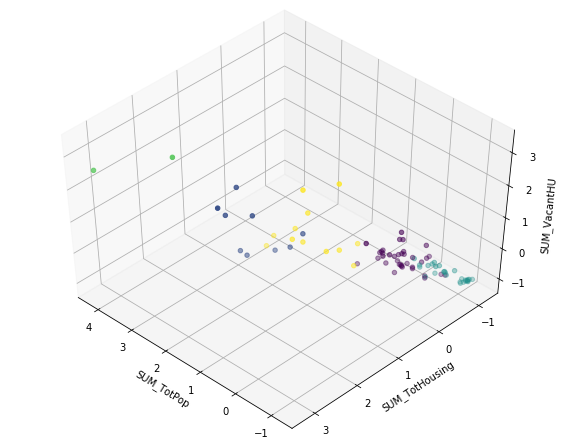

In [102]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('SUM_TotPop')
ax.set_ylabel('SUM_TotHousing')
ax.set_zlabel('SUM_VacantHU')

ax.scatter(X[:, 2], X[:, 24], X[:, 26], c= labels.astype(np.float))

In [103]:
# create a plain world map
map_clusters_demo = folium.Map(location=[29.713116273827442,-95.48188497252305], zoom_start=10)

In [104]:
# generate choropleth map using the cluster label of each neighborhood in Houston (derived from census data alone)
scale=[0,1,2,3,4,5]
map_clusters_demo.choropleth(
    geo_data=houston_geo,
    data=df,
    columns=['Neighborhood','Clus_km'],
    key_on='feature.properties.Name',
    fill_color='RdYlBu',
    fill_opacity=0.7, 
    line_opacity=0.2
)

# display map
map_clusters_demo

#### Run k-means to cluster the neighborhood into 5 clusters based on returned venues via Foursquare API

In [105]:
# Run k-means to cluster the neighborhood into 5 clusters
# set number of clusters
kclusters = 5

houston_grouped_clustering = houston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(houston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [106]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

houston_merged = houston_data

# merge houston_grouped with houston_data to add latitude/longitude for each neighborhood
houston_merged = houston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

houston_merged.head() # check the last columns!

Neighborhood   Latitude  Longitude  OBJECTID  SUM_POP100  \
32                    ACRES HOME  29.864097 -95.436267        33       24465   
87              ADDICKS PARK TEN  29.813150 -95.629790        88        7323   
82  AFTON OAKS / RIVER OAKS AREA  29.747921 -95.435636        83       14007   
52                         ALIEF  29.686317 -95.586392        53      102235   
60                ASTRODOME AREA  29.687930 -95.394966        61       17697   

    SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  SUM_NHOneRace  ...  \
32       9288       24465         4782           19683          19525  ...   
87       4015        7323         2121            5202           5018  ...   
82       8069       14007         1352           12655          12520  ...   
52      35498      102235        47966           54269          52936  ...   
60      11311       17697         1840           15857          15430  ...   

    1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
32     Chinese Restaurant     Travel & Transport         Discount Store   
87                    NaN                    NaN                    NaN   
82                   Bank                   Park               Pharmacy   
52            Video Store    American Restaurant                   Bank   
60    Rental Car Location             Food Truck                    Gym   

    4th Most Common Venue  5th Most Common Venue  6th Most Common Venue  \
32           Burger Joint            Bus Station            Fish Market   
87                    NaN                    NaN                    NaN   
82                   Café         Sandwich Place     Salon / Barbershop   
52          Grocery Store            Tailor Shop            Gas Station   
60            Pizza Place          Deli / Bodega          Grocery Store   

    7th Most Common Venue  8th Most Common Venue    9th Most Common Venue  \
32             Eye Doctor         Farmers Market     Fast Food Restaurant   
87                    NaN                    NaN                      NaN   
82            Gas Station             Donut Shop  New American Restaurant   
52        Automotive Shop      Mobile Phone Shop                     Food   
60            Gas Station            Coffee Shop         Baseball Stadium   

    10th Most Common Venue  
32                   Field  
87                     NaN  
82            Dance Studio  
52       Fondue Restaurant  
60            Liquor Store  

[5 rows x 45 columns]

In [107]:
houston_merged.columns

Index(['Neighborhood', 'Latitude', 'Longitude', 'OBJECTID', 'SUM_POP100',
       'SUM_HU100', 'SUM_TotPop', 'SUM_HispPop', 'SUM_NonHispPop',
       'SUM_NHOneRace', 'SUM_NH_White', 'SUM_NH_Black', 'SUM_NH_AmInd',
       'SUM_NH_Asian', 'SUM_NH_HawPacI', 'SUM_NH_Other', 'SUM_NH_2orMore',
       'SUM_VAP_TotPop', 'SUM_VAP_HispPo', 'SUM_VAP_NonHis', 'SUM_VAP_NHOneR',
       'SUM_VAP_NH_Whi', 'SUM_VAP_NH_Bla', 'SUM_VAP_NH_AmI', 'SUM_VAP_NH_Asi',
       'SUM_VAP_HawPac', 'SUM_VAP_NH_Oth', 'SUM_VAP_NH_2or', 'SUM_TotHousing',
       'SUM_OccHU', 'SUM_VacantHU', 'POLYID', 'Shapearea', 'Shapelen',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [108]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [109]:
houston_merged.shape

(88, 45)

In [126]:
houston_merged.head() # check the last columns!

Neighborhood   Latitude  Longitude  OBJECTID  SUM_POP100  \
32                    ACRES HOME  29.864097 -95.436267        33       24465   
87              ADDICKS PARK TEN  29.813150 -95.629790        88        7323   
82  AFTON OAKS / RIVER OAKS AREA  29.747921 -95.435636        83       14007   
52                         ALIEF  29.686317 -95.586392        53      102235   
60                ASTRODOME AREA  29.687930 -95.394966        61       17697   

    SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  SUM_NHOneRace  \
32       9288       24465         4782           19683          19525   
87       4015        7323         2121            5202           5018   
82       8069       14007         1352           12655          12520   
52      35498      102235        47966           54269          52936   
60      11311       17697         1840           15857          15430   

    SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  SUM_NH_Asian  SUM_NH_HawPacI  \
32           595         18783            40            83               2   
87          2849          1471            19           649               8   
82         11271           457            22           751               4   
52          8596         25589           163         18348              30   
60          5327          3670            19          6352              12   

    SUM_NH_Other  SUM_NH_2orMore  SUM_VAP_TotPop  SUM_VAP_HispPo  \
32            22             158           17494            2910   
87            22             184            5715            1484   
82            15             135           11706            1132   
52           210            1333           71263           30767   
60            50             427           15918            1637   

    SUM_VAP_NonHis  SUM_VAP_NHOneR  SUM_VAP_NH_Whi  SUM_VAP_NH_Bla  \
32           14584           14488             471           13891   
87            4231            4113            2450            1113   
82           10574           10494            9461             378   
52           40496           39649            7582           16958   
60           14281           13925            4996            3190   

    SUM_VAP_NH_AmI  SUM_VAP_NH_Asi  SUM_VAP_HawPac  SUM_VAP_NH_Oth  \
32              35              71               2              18   
87              17             511               7              15   
82              22             621               4               8   
52             120           14842              25             122   
60              16            5670              12              41   

    SUM_VAP_NH_2or  SUM_TotHousing  SUM_OccHU  SUM_VacantHU  POLYID  \
32              96            9288       8434           854       6   
87             118            4015       3523           492       9   
82              80            8069       7107           962      23   
52             847           35498      31612          3886      25   
60             356           11311       9715          1596      34   

      Shapearea      Shapelen  Cluster Labels 1st Most Common Venue  \
32  249767480.5   87815.57942             1.0    Chinese Restaurant   
87  653292432.2  145118.39650             NaN                   NaN   
82  100667673.1   63736.49844             0.0                  Bank   
52  394121668.6   94862.71506             0.0           Video Store   
60   88595118.0   49215.22823             0.0   Rental Car Location   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
32    Travel & Transport        Discount Store          Burger Joint   
87                   NaN                   NaN                   NaN   
82                  Park              Pharmacy                  Café   
52   American Restaurant                  Bank         Grocery Store   
60            Food Truck                   Gym           Pizza Place   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
32           Bus Stat

In [111]:
houston_merged['Cluster Labels'].unique()

array([ 1., nan,  0.,  3.,  2.,  4.])

In [141]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# generate choropleth map using the cluster label of each neighborhood in Houston (derived from venues)
map_clusters.choropleth(
    geo_data=houston_geo,
    data=houston_merged,
    columns=['Neighborhood','Cluster Labels'],
    key_on='feature.properties.Name',
    fill_color='RdYlBu',
    fill_opacity=0.7, 
    line_opacity=0.2,
)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(houston_merged['Latitude'], houston_merged['Longitude'], houston_merged['Neighborhood'], houston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_color='blue').add_to(map_clusters)
       
map_clusters

<a id='item3.5'></a>

#### 3.5 Examine clusters

Examine each cluster and determine the discriminating venue categories that distinguish each cluster. 
Based on the defining categories, recommendations can be made for resource planning.

In [124]:
houston_merged['Cluster Labels'].value_counts()

0.0    62
1.0    19
3.0     2
4.0     1
2.0     1
Name: Cluster Labels, dtype: int64

In [137]:
houston_merged.loc[houston_merged['Cluster Labels'] == 0, houston_merged.columns[[0] + list(range(5, houston_merged.shape[1]))]]

Neighborhood  SUM_HU100  SUM_TotPop  \
82                 AFTON OAKS / RIVER OAKS AREA       8069       14007   
52                                        ALIEF      35498      102235   
60                               ASTRODOME AREA      11311       17697   
78                              BRAESWOOD PLACE      11416       20721   
83                             BRIARFOREST AREA      19959       39031   
29                                   CARVERDALE        887        3143   
27                            CENTRAL NORTHWEST      19024       41561   
50                            CENTRAL SOUTHWEST      19004       60857   
54                                   CLEAR LAKE      24182       56360   
3                    CLINTON PARK TRI-COMMUNITY       1133        2497   
11                 DENVER HARBOR / PORT HOUSTON       5289       17164   
2                                      DOWNTOWN       3664       16716   
80                               EDGEBROOK AREA       7299       20448   
41               FAIRBANKS / NORTHWEST CROSSING       6479       13513   
0                                   FOURTH WARD       2104        3881   
76                             GREATER EASTWOOD       4778       11276   
10                           GREATER FIFTH WARD       8609       19823   
37                          GREATER GREENSPOINT      18633       42793   
15                              GREATER HEIGHTS      21257       40865   
6                            GREATER HOBBY AREA       7411       22317   
74                           GREATER THIRD WARD       5824       13295   
4                                GREATER UPTOWN      31563       49277   
73                  GREENWAY / UPPER KIRBY AREA      15091       19931   
68                      HARRISBURG / MANCHESTER       1046        3158   
39                                KINGWOOD AREA      24317       59484   
40                                 LAKE HOUSTON       5253       14529   
25                                     LANGWOOD       3066        8954   
72                           LAWNDALE / WAYSIDE       4636       12648   
14                     LAZY BROOK / TIMBERGROVE       6264       11715   
66                                    MACGREGOR       9322       17323   
81                                MAGNOLIA PARK       6322       17684   
63                      MEADOWBROOK / ALLENDALE       7513       23115   
64                          MEDICAL CENTER AREA        729        1343   
85                                     MEMORIAL      20069       45294   
79                               MEYERLAND AREA       9361       19700   
75                                     MID WEST      25981       47958   
77                                      MIDTOWN       5568        8526   
71                                  MUSEUM PARK       3123        4877   
84                          NEARTOWN - MONTROSE      19231       28957   
18                            NORTHSIDE VILLAGE       9664       26831   
33                          NORTHSIDE/NORTHLINE      18327       58830   
61                            OST / SOUTH UNION       8550       20152   
62                                   PARK PLACE       3191        9237   
12                           PLEASANTVILLE AREA       1350        3141   
1                                   SECOND WARD       5120       13471   
43                                   SHARPSTOWN      30285       75724   
48                 SOUTH ACRES / CRESTMONT PARK       8041       18941   
47                       SOUTH BELT / ELLINGTON      19643       54434   
58                                   SOUTH MAIN       4464        6976   
22                        SPRING BRANCH CENTRAL       9499       28081   
19                           SPRING BRANCH EAST       9841       25564   
20                          SPRING BRANCH NORTH       8023       19728   
86                           SPRING BRANCH WEST      12350       31352   
51                                    S

In [125]:
houston_merged.loc[houston_merged['Cluster Labels'] == 1, houston_merged.columns[[0] + list(range(5, houston_merged.shape[1]))]]

Neighborhood  SUM_HU100  SUM_TotPop  SUM_HispPop  \
32                        ACRES HOME       9288       24465         4782   
57                          BRAEBURN       8216       19341        11194   
49                        BRAYS OAKS      25068       58671        20573   
31                      EAST HOUSTON       6799       19958         6860   
35      EAST LITTLE YORK / HOMESTEAD       7650       20160         4125   
30              EASTEX - JENSEN AREA       8692       27897        20402   
46                   FONDREN GARDENS       1145        2896         1728   
7    GOLFCREST / BELLFORT / REVEILLE      17530       49757        34780   
5                     GREATER INWOOD      15192       33973        15914   
67  GULFGATE RIVERVIEW / PINE VALLEY       3950       12583        11147   
65                           GULFTON      17283       43947        34161   
34                     HIDDEN VALLEY       1268        4362         2971   
26              INDEPENDENCE HEIGHTS       5550       13388         6129   
16                  KASHMERE GARDENS       4413        9527         2277   
13                        NORTHSHORE       9012       26963        19881   
53                        PECAN PARK       5440       16941        15677   
24                         SETTEGAST       1732        4285          785   
59                        SOUTH PARK       7345       21280         5817   
28         TRINITY / HOUSTON GARDENS       6929       17020         4619   

    SUM_NonHispPop  SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  \
32           19683          19525           595         18783            40   
57            8147           7964          3612          3833            27   
49           38098          37428          7234         26127            71   
31           13098          12994           668         12242            38   
35           16035          15941           332         15525            35   
30            7495           7396          1373          5841            44   
46            1168           1149           209           921             5   
7            14977          14786          3805          9403            70   
5            18059          17769          4920         12080            80   
67            1436           1396           615           643            11   
65            9786           9541          2963          4159            31   
34            1391           1358           604           591             5   
26            7259           7191           919          6166            24   
16            7250           7189           172          6939            13   
13            7082           6953          3363          3374            58   
53            1264           1224           615           315            13   
24            3500           3465            73          3384             6   
59           15463          15365           245         15023            29   
28           12401          12296           251         11984            16   

    SUM_NH_Asian  SUM_NH_HawPacI  SUM_NH_Other  SUM_NH_2orMore  \
32            83               2            22             158   
57           434               3            55             183   
49          3829              25           142             670   
31            23               3            20             104   
35            30               1            18              94   
30           100               1            37              99   
46            13               0             1              19   
7           1434               6            68             191   
5            638               5            46             290   
67           108               0            19              40   
65          2309               0            79             245   
34           157               0             1              33   
26            53               1            28              68  

In [121]:
houston_merged.loc[houston_merged['Cluster Labels'] == 2, houston_merged.columns[[0] + list(range(5, houston_merged.shape[1]))]]

Neighborhood  SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  \
45  FORT BEND / HOUSTON      11069       34520        11094           23426   

    SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  SUM_NH_Asian  \
45          23178           786         22062            45           215   

    SUM_NH_HawPacI  SUM_NH_Other  SUM_NH_2orMore  SUM_VAP_TotPop  \
45               2            68             248           23924   

    SUM_VAP_HispPo  SUM_VAP_NonHis  SUM_VAP_NHOneR  SUM_VAP_NH_Whi  \
45            7008           16916           16797             690   

    SUM_VAP_NH_Bla  SUM_VAP_NH_AmI  SUM_VAP_NH_Asi  SUM_VAP_HawPac  \
45           15848              30             197               2   

    SUM_VAP_NH_Oth  SUM_VAP_NH_2or  SUM_TotHousing  SUM_OccHU  SUM_VacantHU  \
45              30             119           11069      10413           656   

    POLYID    Shapearea    Shapelen  Cluster Labels 1st Most Common Venue  \
45      41  210056758.1  81085.4103             2.0     Convenience Store   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
45  Fast Food Restaurant           Zoo Exhibit           Fish Market   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
45               Exhibit            Eye Doctor        Farmers Market   

   8th Most Common Venue 9th Most Common Venue      10th Most Common Venue  
45                 Field   Filipino Restaurant  Financial or Legal Service

In [122]:
houston_merged.loc[houston_merged['Cluster Labels'] == 3, houston_merged.columns[[0] + list(range(5, houston_merged.shape[1]))]]

Neighborhood  SUM_HU100  SUM_TotPop  SUM_HispPop  \
21  EL DORADO / OATES PRAIRIE        865        3135         2109   
17                   MINNETEX       1282        3503         1586   

    SUM_NonHispPop  SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  \
21            1026           1014           407           582             9   
17            1917           1889           319          1468            10   

    SUM_NH_Asian  SUM_NH_HawPacI  SUM_NH_Other  SUM_NH_2orMore  \
21            11               0             5              12   
17            87               0             5              28   

    SUM_VAP_TotPop  SUM_VAP_HispPo  SUM_VAP_NonHis  SUM_VAP_NHOneR  \
21            2300            1464             836             830   
17            2380             981            1399            1384   

    SUM_VAP_NH_Whi  SUM_VAP_NH_Bla  SUM_VAP_NH_AmI  SUM_VAP_NH_Asi  \
21             373             440               6               8   
17             277            1029               9              66   

    SUM_VAP_HawPac  SUM_VAP_NH_Oth  SUM_VAP_NH_2or  SUM_TotHousing  SUM_OccHU  \
21               0               3               6             865        797   
17               0               3              15            1282       1124   

    SUM_VacantHU  POLYID    Shapearea     Shapelen  Cluster Labels  \
21            68      53  125467378.0  57859.75638             3.0   
17           158      77  233521115.1  80038.57488             3.0   

   1st Most Common Venue 2nd Most Common Venue       3rd Most Common Venue  \
21        Shipping Store        Rental Service                 Zoo Exhibit   
17           Auto Garage           IT Services  Construction & Landscaping   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
21   Filipino Restaurant         Event Service               Exhibit   
17        Rental Service           Fish Market               Exhibit   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
21            Eye Doctor        Farmers Market  Fast Food Restaurant   
17            Eye Doctor        Farmers Market  Fast Food Restaurant   

   10th Most Common Venue  
21                  Field  
17                  Field

In [123]:
houston_merged.loc[houston_merged['Cluster Labels'] == 4, houston_merged.columns[[0] + list(range(5, houston_merged.shape[1]))]]

Neighborhood  SUM_HU100  SUM_TotPop  SUM_HispPop  SUM_NonHispPop  \
38  IAH / AIRPORT AREA       3641       10209         3813            6396   

    SUM_NHOneRace  SUM_NH_White  SUM_NH_Black  SUM_NH_AmInd  SUM_NH_Asian  \
38           6287          1971          4099            19           148   

    SUM_NH_HawPacI  SUM_NH_Other  SUM_NH_2orMore  SUM_VAP_TotPop  \
38              33            17             109            6972   

    SUM_VAP_HispPo  SUM_VAP_NonHis  SUM_VAP_NHOneR  SUM_VAP_NH_Whi  \
38            2439            4533            4474            1689   

    SUM_VAP_NH_Bla  SUM_VAP_NH_AmI  SUM_VAP_NH_Asi  SUM_VAP_HawPac  \
38            2607              16             132              19   

    SUM_VAP_NH_Oth  SUM_VAP_NH_2or  SUM_TotHousing  SUM_OccHU  SUM_VacantHU  \
38              11              59            3641       3272           369   

    POLYID    Shapearea     Shapelen  Cluster Labels 1st Most Common Venue  \
38      42  746833913.2  170943.4768             4.0   Rental Car Location   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
38              Bus Line       Airport Service           Flea Market   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
38            Eye Doctor        Farmers Market  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue      10th Most Common Venue  
38                 Field   Filipino Restaurant  Financial or Legal Service

<a id='item4'></a>

### 4 Results
Descriptive statistical analysis was done to gain insights. Census and venue data were used to cluster neighborhood. In future other data (household, income, etc.) can be visualized along with cluster data for further analysis.

<a id='item5'></a>

### 5 Discussions 
Datasets were read from the Houston GIS open data portal. Data wrangling was done to convert spreadsheet and GeoJSON data to Pandas dataframes for analysis. Histograms were plotted to see the distribution of total population. Scatterplots (with fitted regression lines) were generated using ‘regplot’ to understand relationship between variables. Polygon coordinates were converted into their centroid latitude and longitude values. Foursquare API was used to explore neighborhoods in Houston. The explore function was then used to get the most common venue categories in each neighborhood, and this feature was then used to group the neighborhoods into clusters. The k-means clustering algorithm was used to complete this task. Data were normalized so the variable average is 0 and variance is 1 before clustering. Finally, the Folium library was used to visualize the neighborhoods in Houston and their emerging clusters. Clusters obtained from two datasets (demographics and venues) were then compared.

 <a id='item6'></a>

### 6 Conclusions
The main goal of this project was to analyze data available in public domain to identify zones of opportunity. This in turn would help to attract both practical and innovative investment into underinvested communities while leveraging local and state resources. This information would be useful for area residents and stakeholders that serves as a forum to discuss issues and identify and implement priority projects for the area. Most of the data (census, venue, etc.) are updated on a regular basis. Therefore, it is important to constantly update the underlying model based on newly available data as necessary. In future other data (household, income, etc.) can be visualized along with cluster data for further analysis.

### 7 References <a id='item7'></a> <br>
•	__[Census 2010 By SuperNeighborhood](https://cohgis-mycity.opendata.arcgis.com/datasets/census-2010-by-superneighborhood/data?geometry=-96.897%2C29.406%2C-93.934%2C30.240&selectedAttribute=SUM_POP100)__  <br>
•	__[SuperNeighborhood](https://www.houstontx.gov/planning/Demographics/super_neighborhoods_2.html)__ <br>
•	__[Foursquare](https://developer.foursquare.com/)__ <br>
•	__[Github]()__ <br>
